PREDICTION OF CONCRETE COMPRESSIVE STRENGTH USING MULTIPLE LINEAR REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('Concrete_data.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)


LinearRegression()

In [5]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
y_pred = regressor.predict(X)
residuals = y - y_pred
r2=r2_score(y,y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"R-Squared: {r2:.2f}")
print(f"MAE: {mae:.2f} MPa")
print(f"RMSE: {rmse:.2f} MPa")

R-Squared: 0.62
MAE: 8.21 MPa
RMSE: 10.35 MPa


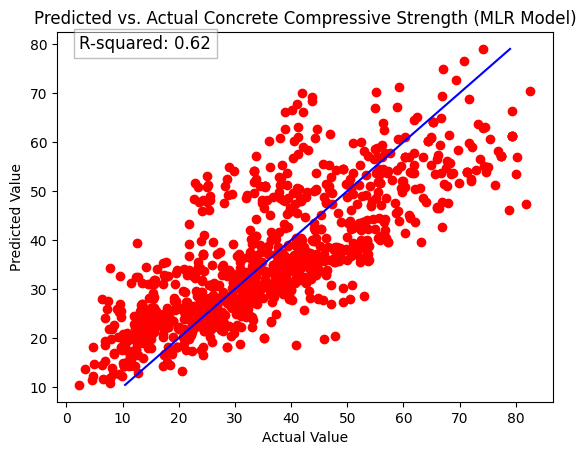

In [6]:
plt.scatter (y,y_pred,color='red')
plt.plot([y_pred.min(),y_pred.max()],[y_pred.min(),y_pred.max()], color='blue')
plt.title('Predicted vs. Actual Concrete Compressive Strength (MLR Model)')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.text(y.min(),y_pred.max(),f'R-squared: {r2_score(y,y_pred):.2f}',fontsize=12,color='black',bbox=dict(facecolor='white',edgecolor='gray',alpha=0.5))
plt.show()



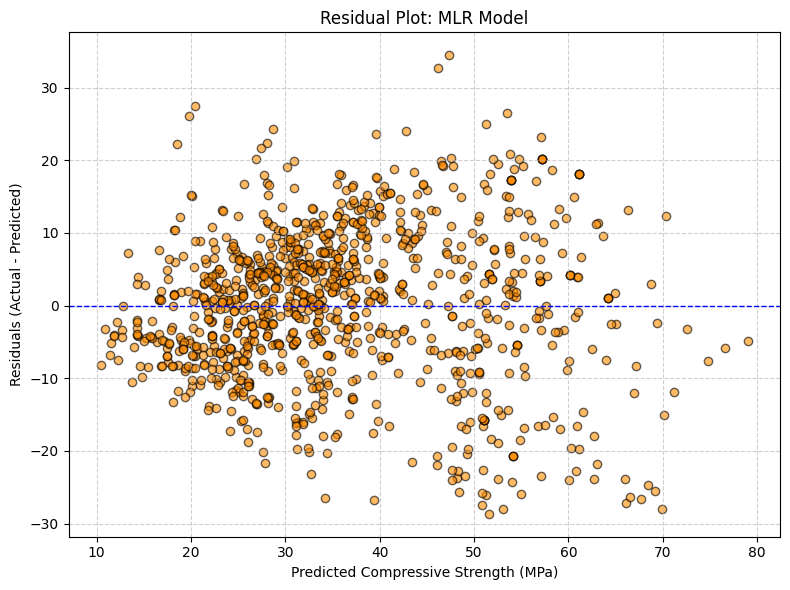

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='darkorange', edgecolor='k')
plt.axhline(y=0, color='blue', linestyle='--', linewidth=1)
plt.xlabel('Predicted Compressive Strength (MPa)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot: MLR Model')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [8]:
coefficients = regressor.coef_
feature_names = dataset.columns[:-1]
df=pd.DataFrame({'Feature':feature_names,'Coefficient':coefficients})
df=df.reindex(df['Coefficient'].abs().sort_values(ascending=True).index)
print(df)

                       Feature  Coefficient
5    Coarse Aggregate (kg/m^3)     0.018086
6      Fine Aggregate (kg/m^3)     0.020190
2             Fly Ash (kg/m^3)     0.087934
1  Blast Furnace Slag (kg/m^3)     0.103866
7                    Age (day)     0.114222
0              Cement (kg/m^3)     0.119804
3               Water (kg/m^3)    -0.149918
4    Superplasticizer (kg/m^3)     0.292225


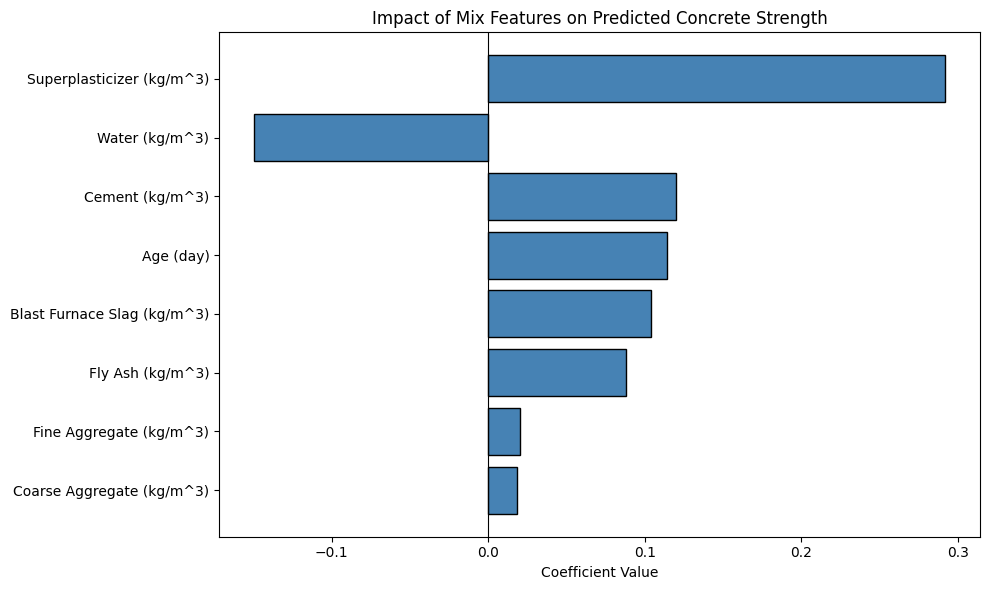

In [9]:
plt.figure(figsize=(10, 6))
bars = plt.barh(df['Feature'], df['Coefficient'], color='steelblue', edgecolor='black')
plt.axvline(0, color='black', linewidth=0.8)
plt.xlabel('Coefficient Value')
plt.title('Impact of Mix Features on Predicted Concrete Strength')
plt.tight_layout()
plt.show()
